C:\Users\Hp\AppData\Local\Temp\ipykernel_1524\1505371320.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[0].scatter(x_coords, y_coords, s=3, alpha=0.6, c="black", cmap='YlOrRd')


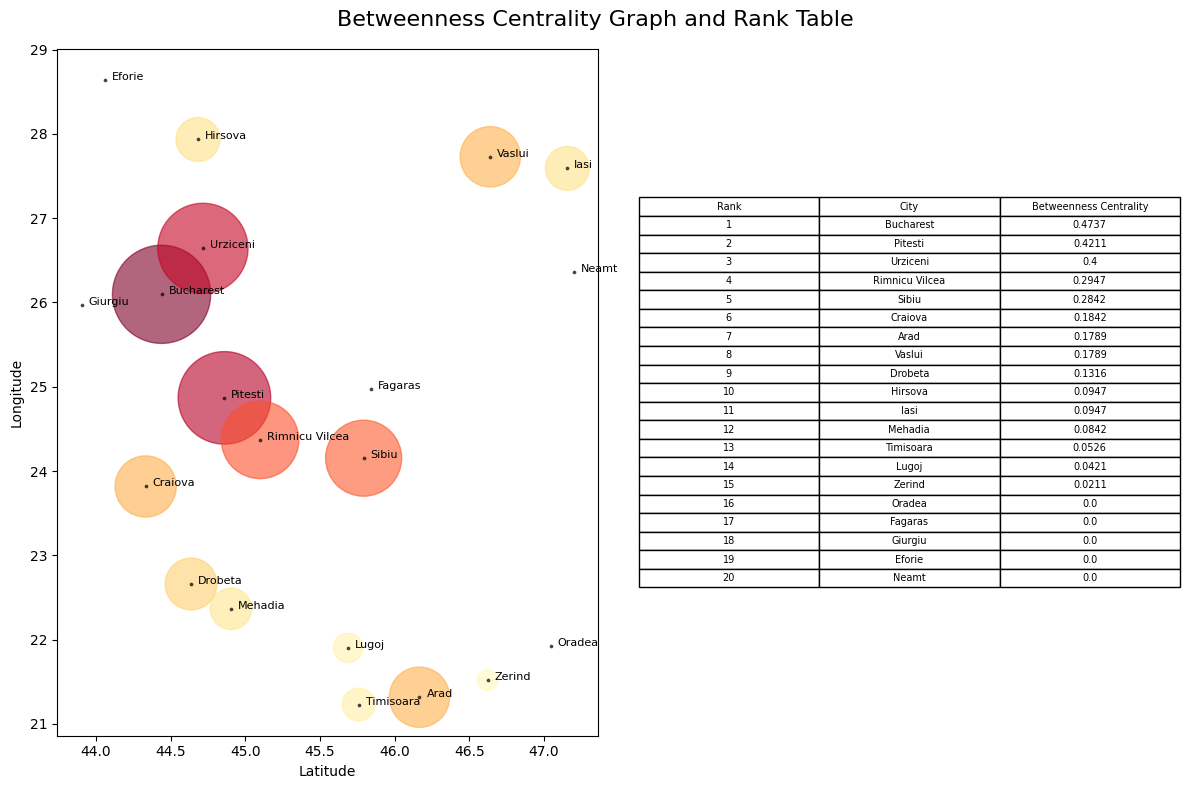

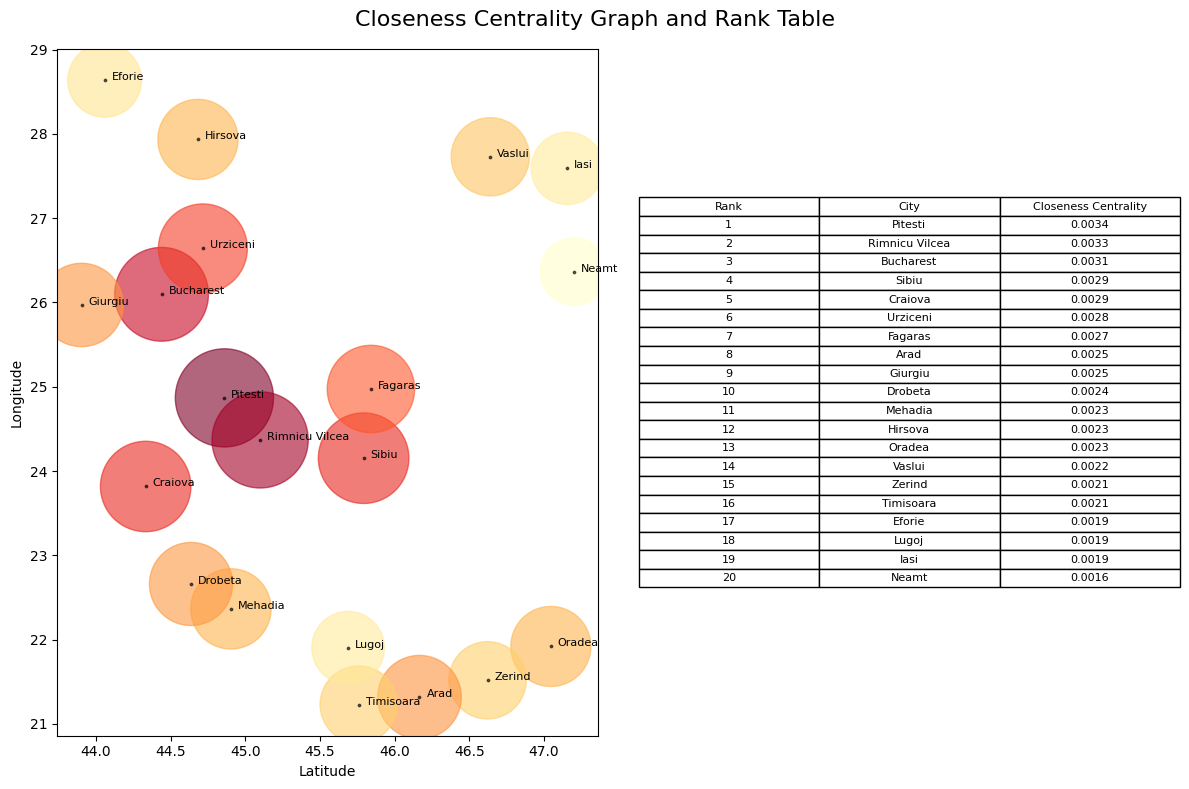

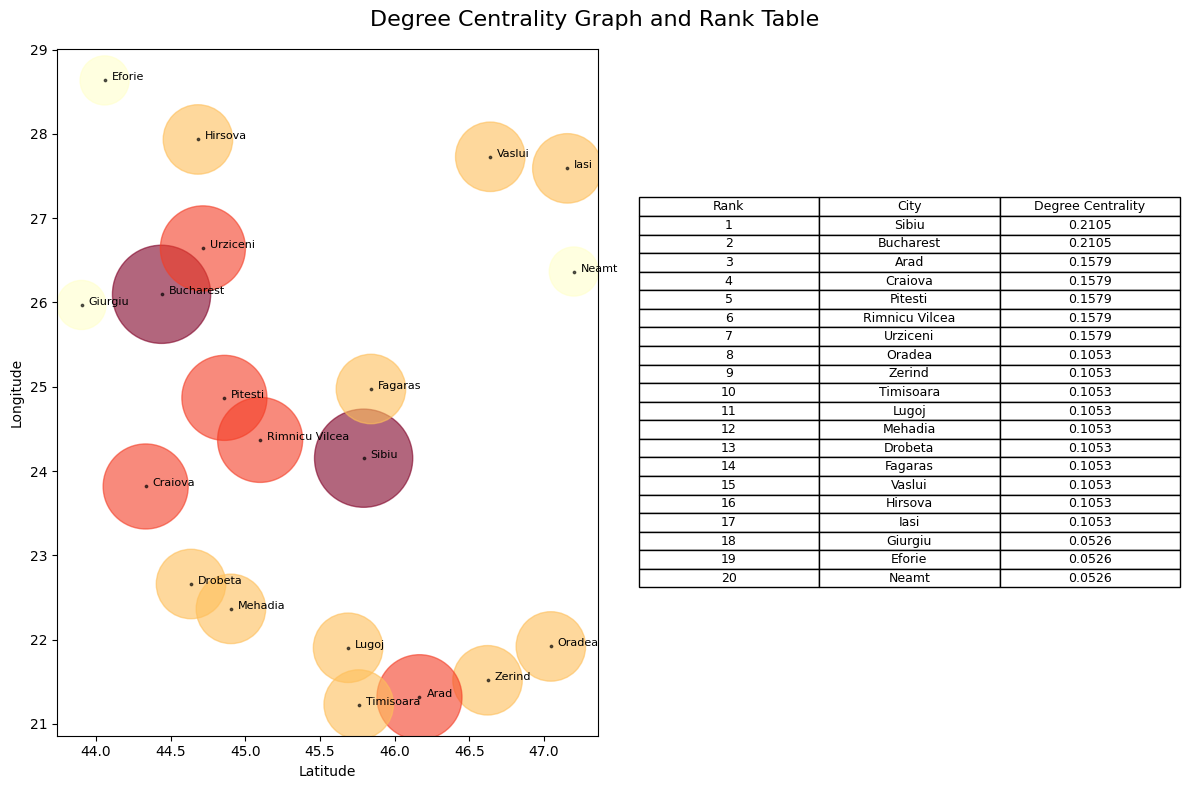

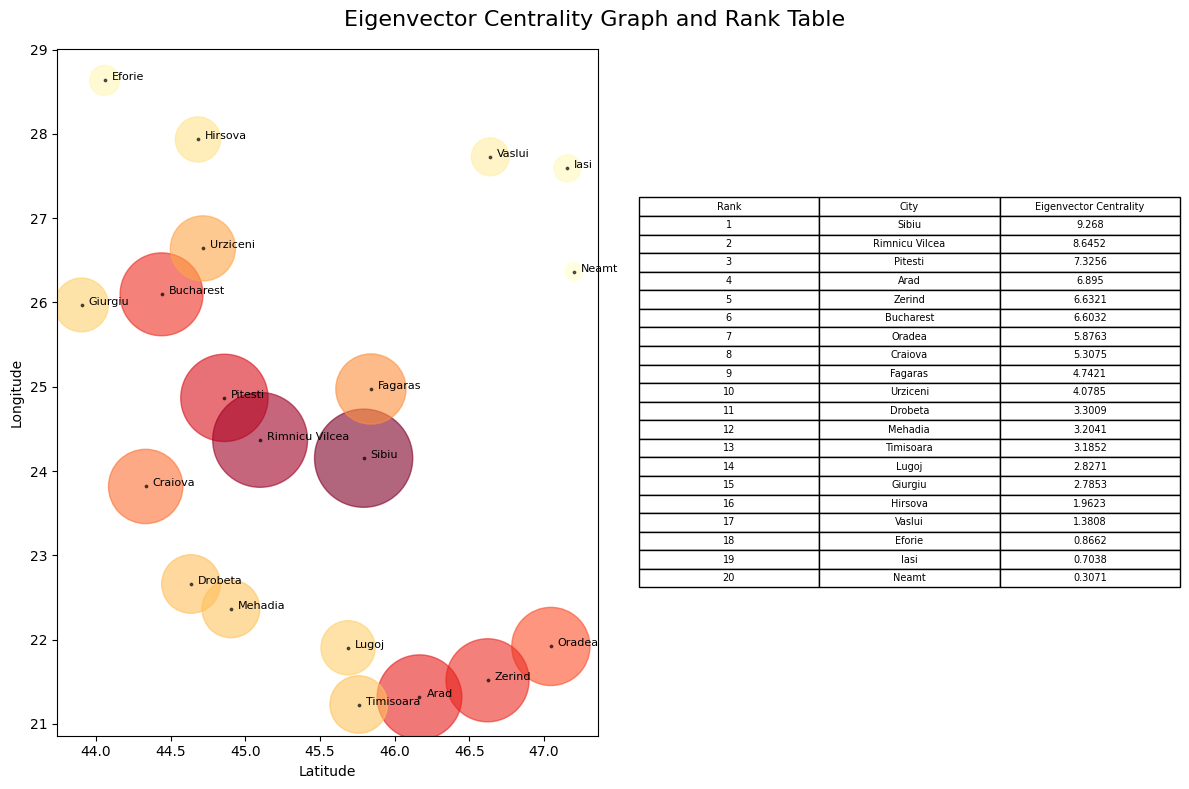

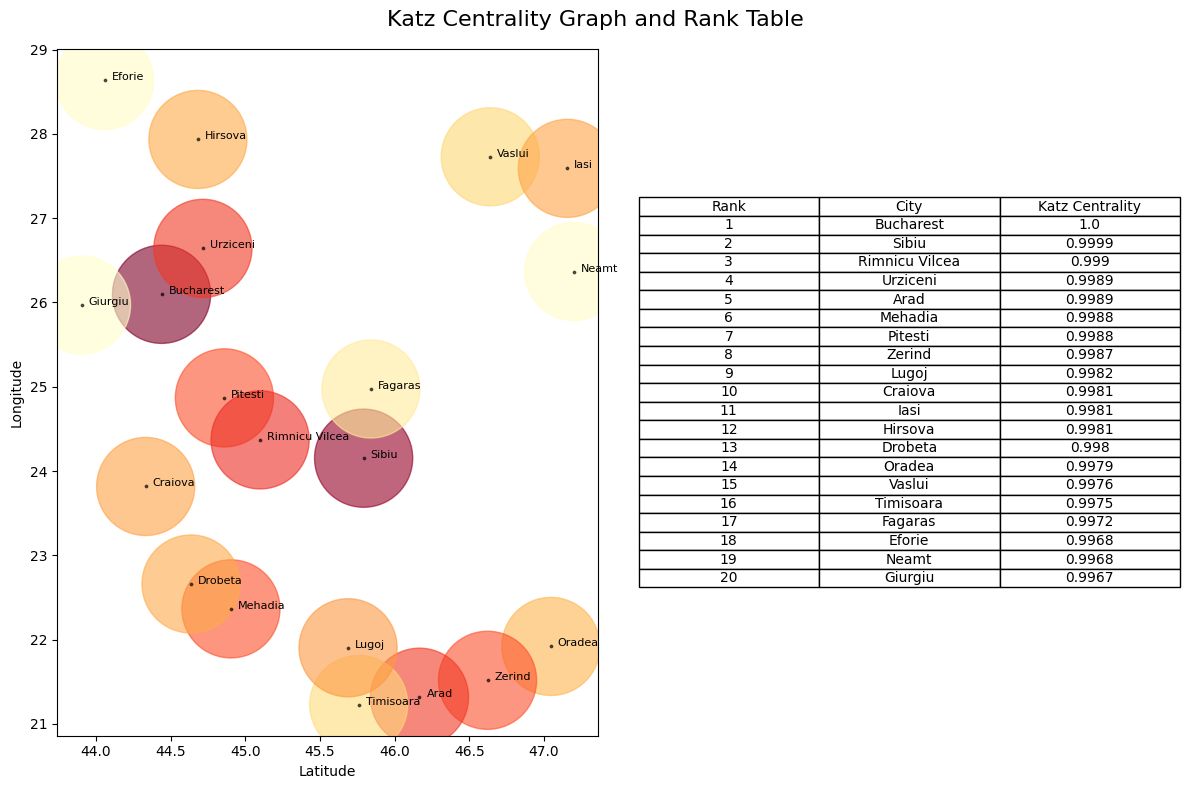

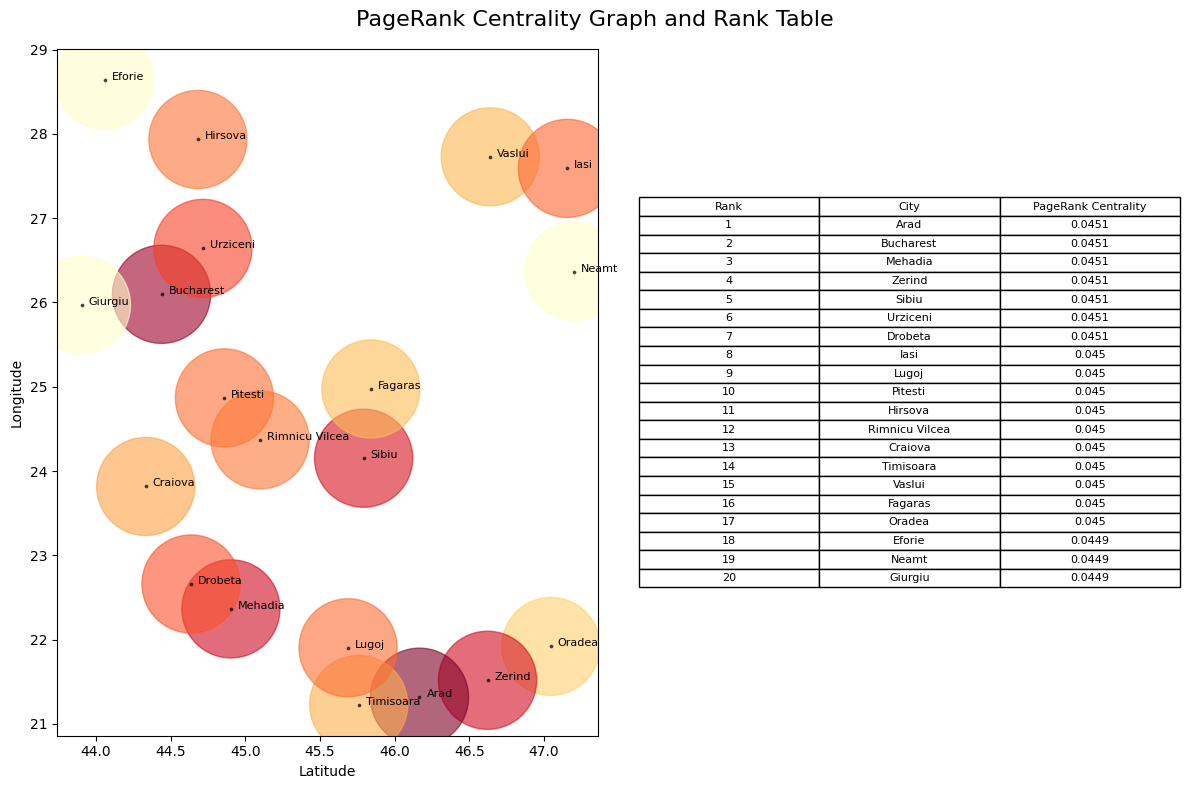

In [2]:
from typing import List, Mapping, Tuple
from centrality import Centrality as center
from romania_city import Romania
import matplotlib.pyplot as plt

# compute the centrality of every Romanian city.
romania_graph = Romania().get_city()
romania_coordinates = Romania().get_coordinates()

centrality_list : List[Tuple[Mapping,str]] = [
    (center.betweenness_centrality(romania_graph), "Betweenness"),\
    (center.closeness_centrality(romania_graph), "Closeness"),
    (center.degree_centrality(romania_graph), "Degree"),\
    (center.eigenvector_centrality(romania_graph), "Eigenvector"),\
    (center.katz_centrality(romania_graph), "Katz"),\
    (center.pagerank_centrality(romania_graph), "PageRank")
]

x_values = list(romania_graph.get_nodes())

# extract the x and y coordinates into separate lists
x_coords = [romania_coordinates[node][0] for node in x_values]
y_coords = [romania_coordinates[node][1] for node in x_values]

for centrality in centrality_list:
    y_values = []
    centrality_function, centrality_name = centrality

    for key in x_values:
        y_values.append(centrality_function[key])

    # create a figure with 1 row and 2 columns
    fig, axs = plt.subplots(1, 2, figsize=(12,8))
    max_value = max(y_values)

    # plot the scatter chart in the first column
    sizes = [centrality_function[node]*5000/max_value for node in x_values]

    axs[0].scatter(x_coords, y_coords, s=sizes, alpha=0.6, c=y_values, cmap='YlOrRd')
    axs[0].scatter(x_coords, y_coords, s=3, alpha=0.6, c="black", cmap='YlOrRd')
    axs[0].set_xlabel('Latitude') 
    axs[0].set_ylabel('Longitude')

    # add annotations to the scatter plot
    for i, node in enumerate(x_values):
        axs[0].annotate(node, xy=(x_coords[i], y_coords[i]), xytext=(5, 0), textcoords='offset points', fontsize=8)

    # create a sorted list of cities by centrality
    sorted_cities = sorted(x_values, key=lambda x: centrality_function[x], reverse=True)

    # create a table displaying the ranking of cities by centrality in the second column
    table_data = [["Rank", "City", centrality_name + " Centrality"]]
    for i in range(len(sorted_cities)):
        table_data.append([str(i+1), sorted_cities[i], round(centrality_function[sorted_cities[i]], 4)])

    axs[1].axis('off')
    axs[1].axis('tight')
    axs[1].table(cellText=table_data, colLabels=None, cellLoc='center', loc='center') # type: ignore

    fig.suptitle(f'{centrality_name} Centrality Graph and Rank Table', fontsize=16)
    fig.tight_layout()

    # show the figure
    plt.show()
